In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [56]:
# --- 1. Load the Dataset ---
# Ensure 'philippines_typhoon_monthly_2014_2024.csv' is in the same folder as this script.
try:
    df = pd.read_csv('philippines_typhoon_monthly_2014_2024.csv')
    print("Typhoon dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'philippines_typhoon_monthly_2014_2024.csv' not found.")
    print("Please make sure the dataset file is in the correct directory.")
    exit()


Typhoon dataset loaded successfully.


In [57]:
# --- 2. Define Variables ---
# Define the dependent variable (DV) and independent variables (IVs).
dependent_var = 'Number_of_Typhoons'
independent_vars_all = ['ONI', 'Western_Pacific_SST', 'Vertical_Wind_Shear']



Generating enhanced scatter plots (regression line, 95% CI, correlations)...


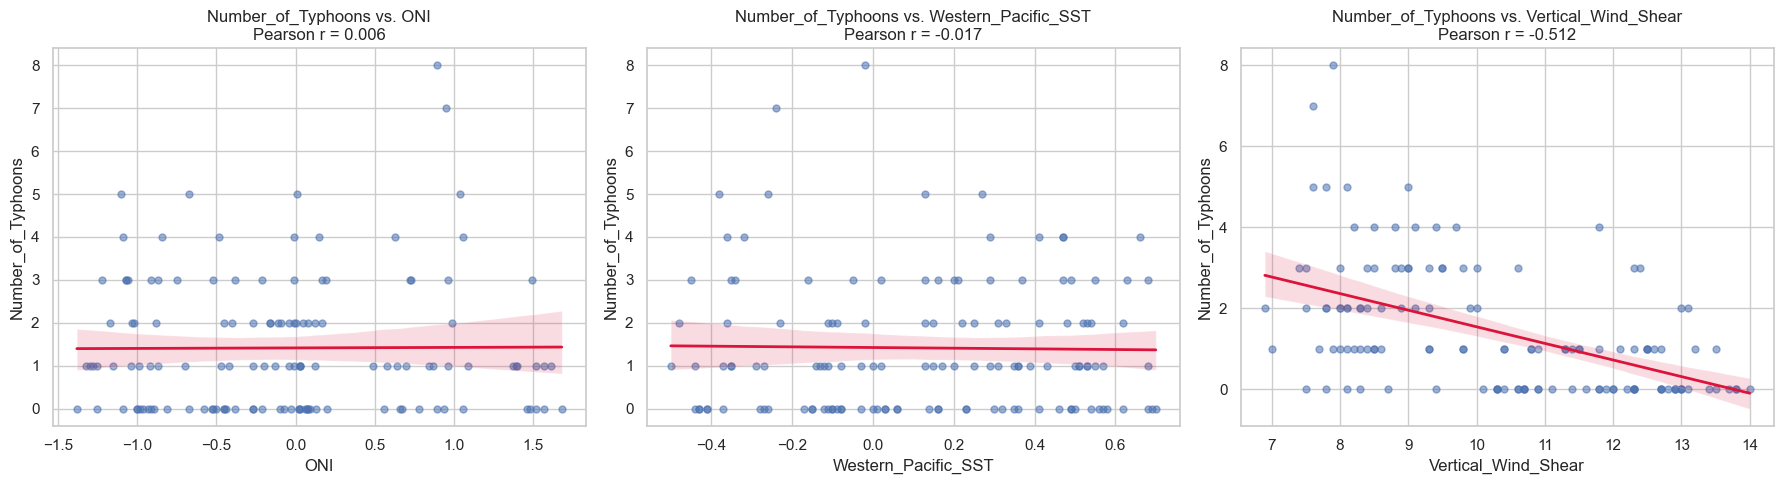

In [58]:

# --- Enhanced Scatter Diagrams with Regression Lines ---
print("Generating enhanced scatter plots (regression line, 95% CI, correlations)...")
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(18, 5))

for i, iv in enumerate(independent_vars_all):
    plt.subplot(1, 3, i + 1)
    # Scatter + regression line with 95% confidence interval
    sns.regplot(
        x=df[iv],
        y=df[dependent_var],
        scatter_kws={"alpha": 0.55, "s": 25},
        line_kws={"color": "crimson", "lw": 2},
        ci=95,
        truncate=True
    )
    # Pearson correlation
    corr = df[[iv, dependent_var]].corr(method="pearson").iloc[0, 1]
    plt.title(f"{dependent_var} vs. {iv}\nPearson r = {corr:.3f}")
    plt.xlabel(iv)
    plt.ylabel(dependent_var)

plt.tight_layout()
plt.savefig('typhoon_scatter_plots.png', dpi=150, bbox_inches='tight')
plt.show()
plt.close()

In [59]:
# --- 4. Construct and Analyze Regression Models ---
print("\n--- Building and Evaluating Regression Models ---")

# Define the model configurations based on the corrected list of IVs.
models_to_run = {
    'Model 1 (All IVs)': ['ONI', 'Western_Pacific_SST', 'Vertical_Wind_Shear'],
    'Model 2 (ONI, W_Pacific_SST)': ['ONI', 'Western_Pacific_SST'],
    'Model 3 (ONI, V_Wind_Shear)': ['ONI', 'Vertical_Wind_Shear'],
    'Model 4 (W_Pacific_SST, V_Wind_Shear)': ['Western_Pacific_SST', 'Vertical_Wind_Shear']
}

model_results = {}

for name, ivs in models_to_run.items():
    print(f"\n--- Analyzing {name} ---")
    y = df[dependent_var]
    X = df[ivs]
    X = sm.add_constant(X) # Add the intercept

    model = sm.OLS(y, X).fit()
    model_results[name] = {
        'adj_r_squared': model.rsquared_adj,
        'model_summary': model.summary()
    }
    print(model.summary())



--- Building and Evaluating Regression Models ---

--- Analyzing Model 1 (All IVs) ---
                            OLS Regression Results                            
Dep. Variable:     Number_of_Typhoons   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     15.38
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           1.32e-08
Time:                        15:21:51   Log-Likelihood:                -226.26
No. Observations:                 132   AIC:                             460.5
Df Residuals:                     128   BIC:                             472.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [60]:
# --- 5. Compare Models and Select the Best One ---
print("\n--- Model Comparison (Adjusted R-squared) ---")
best_model_name = max(model_results, key=lambda name: model_results[name]['adj_r_squared'])
best_adj_r2 = model_results[best_model_name]['adj_r_squared']

for name, results in model_results.items():
    print(f"{name}: {results['adj_r_squared']:.4f}")

print(f"\nBest Model: {best_model_name} with an Adjusted R-squared of {best_adj_r2:.4f}")




--- Model Comparison (Adjusted R-squared) ---
Model 1 (All IVs): 0.2478
Model 2 (ONI, W_Pacific_SST): -0.0152
Model 3 (ONI, V_Wind_Shear): 0.2512
Model 4 (W_Pacific_SST, V_Wind_Shear): 0.2536

Best Model: Model 4 (W_Pacific_SST, V_Wind_Shear) with an Adjusted R-squared of 0.2536


In [61]:
# --- 6. Forecast Using the Best Model ---
print("\n--- Forecasting with the Best Model ---")

best_model_ivs = models_to_run[best_model_name]

# Create a sample data point for forecasting using the average of each variable.
new_data_point = df[best_model_ivs].mean().to_dict()
new_data_for_pred = pd.DataFrame([new_data_point])
new_data_for_pred = sm.add_constant(new_data_for_pred, has_constant='add')

print("Forecasting for new data point (using mean values):")
print(new_data_point)

# Re-fit the best model to make a prediction
y = df[dependent_var]
X = sm.add_constant(df[best_model_ivs])
best_model_fit = sm.OLS(y, X).fit()

prediction = best_model_fit.predict(new_data_for_pred)

print(f"\nPredicted Number of Typhoons: {prediction.iloc[0]:.4f}")


--- Forecasting with the Best Model ---
Forecasting for new data point (using mean values):
{'Western_Pacific_SST': 0.12825757575757576, 'Vertical_Wind_Shear': 10.303787878787878}

Predicted Number of Typhoons: 1.4167


In [ ]:
# --- 3b. Save each scatter plot as its own image ---
print("Saving individual scatter plots per variable...")
import seaborn as sns
import numpy as np
from scipy import stats

sns.set_theme(style="whitegrid")

for iv in independent_vars_all:
    plt.figure(figsize=(6, 5))

    # Scatter + linear fit
    sns.scatterplot(x=df[iv], y=df[dependent_var], s=28, alpha=0.55, edgecolor='none', color="#268bd2")
    sns.regplot(x=df[iv], y=df[dependent_var], scatter=False, ci=None,
                line_kws={"color": "#d33682", "lw": 2.0, "label": "Linear fit"})
    # LOWESS trend
    sns.regplot(x=df[iv], y=df[dependent_var], scatter=False, lowess=True, ci=None,
                line_kws={"color": "#2aa198", "lw": 1.8, "ls": "--", "label": "LOWESS"})

    # Stats annotation
    clean = df[[iv, dependent_var]].dropna()
    if not clean.empty:
        r, p = stats.pearsonr(clean[iv], clean[dependent_var])
        b, a = np.polyfit(clean[iv], clean[dependent_var], 1)
        plt.text(0.02, 0.98, f"r = {r:.3f}\np = {p:.3g}\ny = {a:.3f} + {b:.3f}x",
                 transform=plt.gca().transAxes, va="top", ha="left",
                 fontsize=9, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="#ccc"))

    plt.title(f"{dependent_var} vs. {iv}")
    plt.xlabel(iv)
    plt.ylabel(dependent_var)
    plt.legend(loc="lower right", frameon=True)
    plt.tight_layout()

    out_path = f"typhoon_scatter_{iv}.png"
    plt.savefig(out_path, dpi=160, bbox_inches='tight')
    print(f"Saved: {out_path}")
    plt.show()
    plt.close()
